In [10]:
import torch

x = torch.arange(4.0)
x.requires_grad_(True)
x.grad  

1.为什么计算二阶导数比一阶导数的开销要更大？

计算二阶导数需要对目标函数进行两次求导，求他的偏导数要进行比一阶导数平方倍的计算

2.在运行反向传播函数之后，立即再次运行它，看看会发生什么。

In [19]:
x.grad.zero_()
y = x * x
y.sum().backward()
x.grad

tensor([0., 2., 4., 6.])

In [26]:
#x.grad.zero_()
y = x * x
y.sum().backward()
x.grad

tensor([ 0., 14., 28., 42.])

若没有x.grad.zero_()则无限迭代

3.在控制流的例子中，我们计算d关于a的导数，如果将变量a更改为随机向量或矩阵，会发生什么？

In [29]:
def f(a):
    b = a * 2
    while b.norm() < 1000:
        b = b * 2
    if b.sum() > 0:
        c = b
    else:
        c = 100 * b
    return c
a = torch.randn(size=(3,3), requires_grad=True)
d = f(a)
d.backward()

RuntimeError: grad can be implicitly created only for scalar outputs

计算表达式 b.norm() < 1000 和 b.sum() > 0 时会出现错误，backward()不能对张量进行

4.重新设计一个求控制流梯度的例子，运行并分析结果。

In [32]:
import torch

def f(a):
    if a > 0:
        b = a * 2
    else:
        b = a * 3
    return b

a = torch.tensor(1.0, requires_grad=True)
b = f(a)
b.backward()
print(a.grad) # 输出 2.0

a = torch.tensor(-1.0, requires_grad=True)
b = f(a)
b.backward()
print(a.grad) # 输出 3.0

tensor(2.)
tensor(3.)


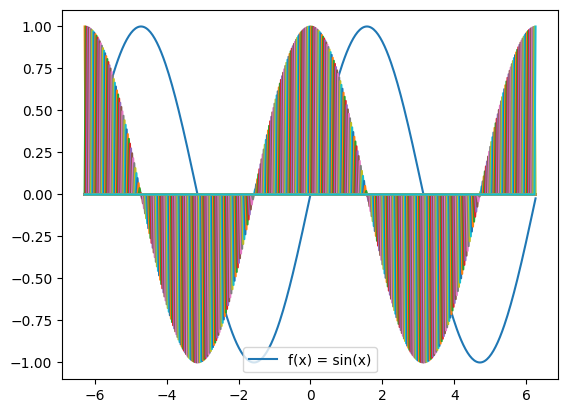

In [41]:
import torch
from matplotlib import pyplot as plt

def f(x):
    return torch.sin(x)

x = torch.arange(-2 * 3.14, 2 * 3.14, 0.03)
y = f(x)

y_prime = torch.autograd.functional.jacobian(f,x).squeeze()

plt.plot(x.numpy(), y.numpy(), label='f(x) = sin(x)')
plt.plot(x.numpy(), y_prime.numpy())
plt.legend()
plt.show()